## Import relevant libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# import dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv'
df = pd.read_csv(url)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


## Preprocess the data

In [3]:
# save data to local machine
df.to_csv('Data_for_UCI_named.csv')

In [3]:
# drop the numerical target variable (stab)
df = df.drop(['stab'], axis=1)

In [4]:
# split data into train and test sets
train, test = train_test_split(df, test_size=.2, random_state=1)

In [5]:
# split out predictors and target variables from datasets
x_train = train.drop(['stabf'], axis=1)
y_train = train['stabf']
x_test = test.drop(['stabf'], axis=1)
y_test = test.stabf
x_train.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254


In [6]:
# create a copy of the train and test predictors for easy retrieval of the originals if needed
# REMOVE IF NOT USED



x_train_copy, x_test_copy = x_train.copy(), x_test.copy()

In [7]:
# Scaled the predictors (train and test)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[ 0.36732671, -0.98604156,  0.65044706, ...,  0.33985949,
         0.58556788,  0.49223946],
       [-0.06465869,  0.08943734,  1.03507899, ..., -1.5584875 ,
         1.42964862, -1.44352101],
       [-1.46785   ,  1.29841758, -0.50253617, ...,  1.45153362,
        -1.04574277,  0.49248925],
       ...,
       [ 0.65760851, -0.72275633, -1.4058879 , ...,  0.29310048,
        -1.55058661,  0.81034412],
       [-0.05931596, -1.26053241, -1.01047147, ..., -0.38825455,
        -0.72678059,  1.66791568],
       [-1.47321368,  0.63843757,  0.25012249, ..., -1.17410957,
         1.179282  ,  0.78362657]])

## spot check the algorithms on the dataset using k=5 fold cross validation

In [37]:
models = []

models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LGB', LGBMClassifier()))


# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 1
num_fold = 5
scoring = 'roc_auc'

for name, model in models:
    kfold = KFold(n_splits=num_fold,
                  random_state=seed)
    cv_results = cross_val_score(model,
                                 x_train_scaled,
                                 y_train, cv=kfold,
                                 scoring=scoring)
    
    
    # append each model results into empty lists created
    results.append(cv_results)
    names.append(name)
    
    see_results = '%s: %f (%f)' % (name,
                                   cv_results.mean(),
                                   cv_results.std())
    print(see_results)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RFC: 0.977810 (0.002702)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ETC: 0.983209 (0.001934)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.977406 (0.003840)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LGB: 0.987849 (0.002330)


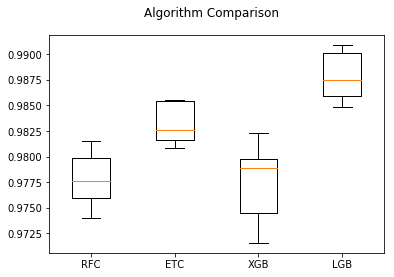

In [38]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hyperparameter tuning

##### Tuning extra trees classifier

In [45]:
# instantiate model
etc_model = ExtraTreesClassifier()

# set hyperparameters
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparam_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

seed = 1
num_fold = 5
scoring = 'roc_auc'

# run randomsearch
kfold = KFold(n_splits=num_fold)
grid_search = RandomizedSearchCV(estimator=etc_model,
                                 param_distributions=hyperparam_grid,
                                 scoring=scoring, cv=kfold)
grid_result = grid_search.fit(x_train_scaled, y_train)

In [46]:
# print results
print("Best ROC_AUC: %f using %s" % (grid_result.best_score_,
                                     grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best ROC_AUC: 0.987002 using {'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
0.983259 (0.002278) with: {'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': None}
0.986263 (0.002124) with: {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
0.985341 (0.002156) with: {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}
0.985052 (0.002163) with: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}
0.980422 (0.001870) with: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}
0.980901 (0.002782) with: {'n_estimators': 50, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None}
0.983833 (0.001980) with: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}
0.984881 (0.001664) with: {'n_estimators': 100, 'mi

##### Tuning random forest classifier

In [47]:
# tuning RandomForest Classifier
rfc = RandomForestClassifier()

# set hyperparameters
hyperparam_grid = {'n_estimators': [50, 100, 300, 500, 1000],
                   'min_samples_split': [2, 3, 5, 7, 9],
                   'min_samples_leaf': [1, 2, 4, 6, 8],
                   'max_features': ['auto', 'sqrt', 'log2', None]}


seed = 1
num_fold = 5
scoring = 'roc_auc'

# run randomsearch
kfold = KFold(n_splits=num_fold)
grid_search = RandomizedSearchCV(estimator=etc_model,
                                 param_distributions=hyperparam_grid,
                                 scoring=scoring, cv=kfold)
grid_result = grid_search.fit(x_train_scaled, y_train)

# print results
print("Best ROC_AUC: %f using %s" % (grid_result.best_score_,
                                     grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best ROC_AUC: 0.986932 using {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
0.983966 (0.001562) with: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
0.984059 (0.001893) with: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2'}
0.981320 (0.002574) with: {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'auto'}
0.985351 (0.001853) with: {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}
0.982489 (0.002096) with: {'n_estimators': 100, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None}
0.983337 (0.002290) with: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}
0.979361 (0.002942) with: {'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
0.979941 (0.002603) with: {'n_estimators': 50, 

## Retrain Model with Best Hyperparameters and Predict on Test Set

In [48]:
models = []

models.append(('RFC',
               RandomForestClassifier(n_estimators=1000,
                                      min_samples_split= 5,
                                      min_samples_leaf=2,
                                      max_features='sqrt')))
models.append(('ETC',
               ExtraTreesClassifier(n_estimators=1000,
                                    min_samples_split= 3,
                                    min_samples_leaf=2,
                                    max_features='sqrt')))

report = []
conf_matrix = []
names = []

for name, model in models:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    names.append(name)
    conf_matrix.append(confusion_matrix(y_test, y_pred))
    report.append(classification_report(y_test, y_pred))

In [51]:
print('Report for RandomForestClassifier:')
print(names[0])
print(conf_matrix[0])
print(report[0])

Report for RandomForestClassifier:
RFC
[[ 618   94]
 [  60 1228]]
              precision    recall  f1-score   support

      stable       0.91      0.87      0.89       712
    unstable       0.93      0.95      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.91      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [52]:
print('Report for ExtraTreesClassifier:')
print(names[1])
print(conf_matrix[1])
print(report[1])

Report for ExtraTreesClassifier:
ETC
[[ 595  117]
 [  15 1273]]
              precision    recall  f1-score   support

      stable       0.98      0.84      0.90       712
    unstable       0.92      0.99      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.95      0.91      0.93      2000
weighted avg       0.94      0.93      0.93      2000

